In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
v = 2
p = 0.05
n = 200

Y = np.random.standard_t(2, size=n)
X = np.exp(0.01*Y) - 1
X = pd.DataFrame(X)

R0 = 1
L = - X/R0
L = L.sort_values(0, ascending=False).reset_index(drop=True)

In [3]:
# Estimate ES
def ES(X, n, p, R0 = 1):
    np_ = int(n*p) - 1
    
    L = - X/R0
    L = L.sort_values(0, ascending=False).reset_index(drop=True)
    return (1/p)*( L.loc[:np_].mean()[0] + ( p - np_/n)*L.loc[np_+1][0])

# Estimate TCM
def TCM(X, n, p, R0 = 1):
    np_ = int(n*p) - 1
    
    L = - X/R0
    L = L.sort_values(0, ascending=False).reset_index(drop=True)
    
    VaR = L.loc[np_ + 1][0]
    TCM = L[L >= VaR].dropna().median()[0]
    
    return TCM

#General Thetha sampler
def draw_theta(func, sample_size, v):
    p = 0.05
    n = 200
    
    draws = []
    for i in range(sample_size):
        Y = np.random.standard_t(v, size=n)
        X = np.exp(0.01*Y) - 1
        X = pd.DataFrame(X)
        
        draws.append(func(X, n, p))
    return draws

In [91]:
sample_size = int(1e5)
v = 2
ES_draws = draw_theta(ES, sample_size, v)
TCM_draws = draw_theta(TCM, sample_size, v)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

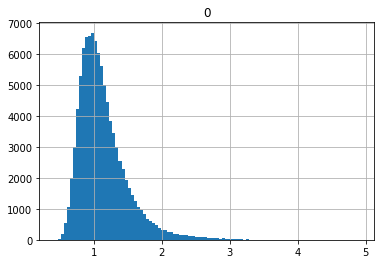

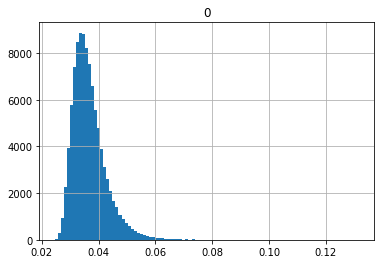

In [107]:
pd.DataFrame(ES_draws).hist(bins=100)
pd.DataFrame(TCM_draws).hist(bins=100)

In [4]:
sample_size = int(1e5)
v = 10
ES_draws_ = draw_theta(ES, sample_size, v)
TCM_draws_ = draw_theta(TCM, sample_size, v)

NameError: name 'VaR_' is not defined

In [ ]:
pd.DataFrame(ES_draws_).hist(bins=100)
pd.DataFrame(TCM_draws_).hist(bins=100)